<a href="https://colab.research.google.com/github/Mabzak-Knight/penerjemah_manga/blob/main/colab/Penerjemah_halaman_manga_(alfa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kha-white/comic-text-detector/

Cloning into 'comic-text-detector'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 329 (delta 60), reused 56 (delta 56), pack-reused 254
Receiving objects: 100% (329/329), 10.04 MiB | 25.89 MiB/s, done.
Resolving deltas: 100% (209/209), done.


In [7]:
!pip install git+https://github.com/kodalli/pydensecrf.git

  Cloning https://github.com/kodalli/pydensecrf.git to /tmp/pip-req-build-prg6kihk
  Running command git clone --filter=blob:none --quiet https://github.com/kodalli/pydensecrf.git /tmp/pip-req-build-prg6kihk
  Resolved https://github.com/kodalli/pydensecrf.git to commit e22f579af72688a3dbd3192f43918f6e9879cb4f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pydensecrf: filename=pydensecrf-1.0rc2-cp310-cp310-linux_x86_64.whl size=3405518 sha256=4649b9308555be6b555787defb1a8078719485662c932451e1923482ccbee461
  Stored in directory: /tmp/pip-ephem-wheel-cache-2vphgtx5/wheels/68/a8/4d/a4108d27abcf25274aca123da3862c3fa7ff7f26655c8dc5c1
Successfully built pydensecrf


In [8]:
cd /content/comic-text-detector

/content/comic-text-detector


In [14]:
!git clone https://github.com/Mabzak-Knight/penerjemah_manga.git

Cloning into 'penerjemah_manga'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 40
Receiving objects: 100% (41/41), 62.79 MiB | 21.00 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [10]:
pip install pyclipper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 6.7 MB/s eta 0:00:00


In [12]:
import cv2
from inference import model2annotations
from google.colab.patches import cv2_imshow

In [17]:
img_dir = r'data/tes'
model_path = r'data/comictextdetector.pt'
img_dir = r'data/tes'                              # can be dir list
save_dir = r'data/examples/annotations'
model2annotations(model_path, img_dir, save_dir, save_json=False)

100%|██████████| 1/1 [00:04<00:00,  4.96s/it]


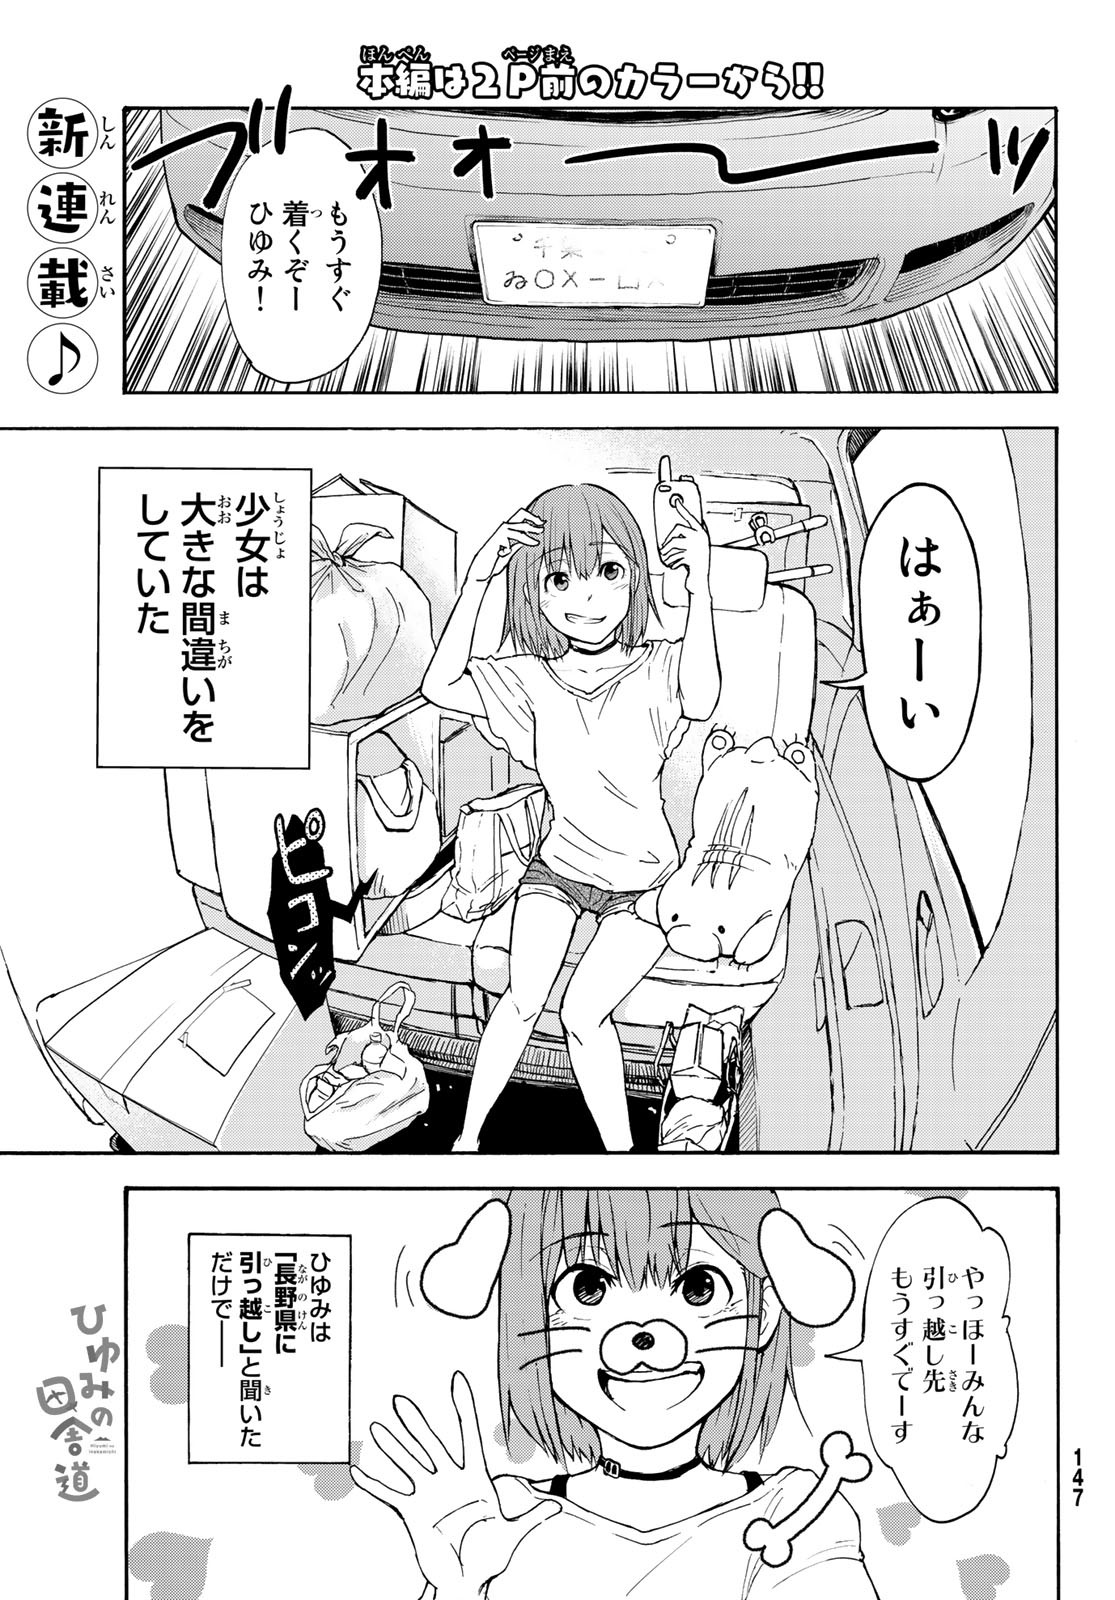

In [245]:
# Baca gambar
lokasi_image = '/content/comic-text-detector/data/examples/annotations/003.png'
image_awal = cv2.imread(lokasi_image)
cv2_imshow(image_awal)

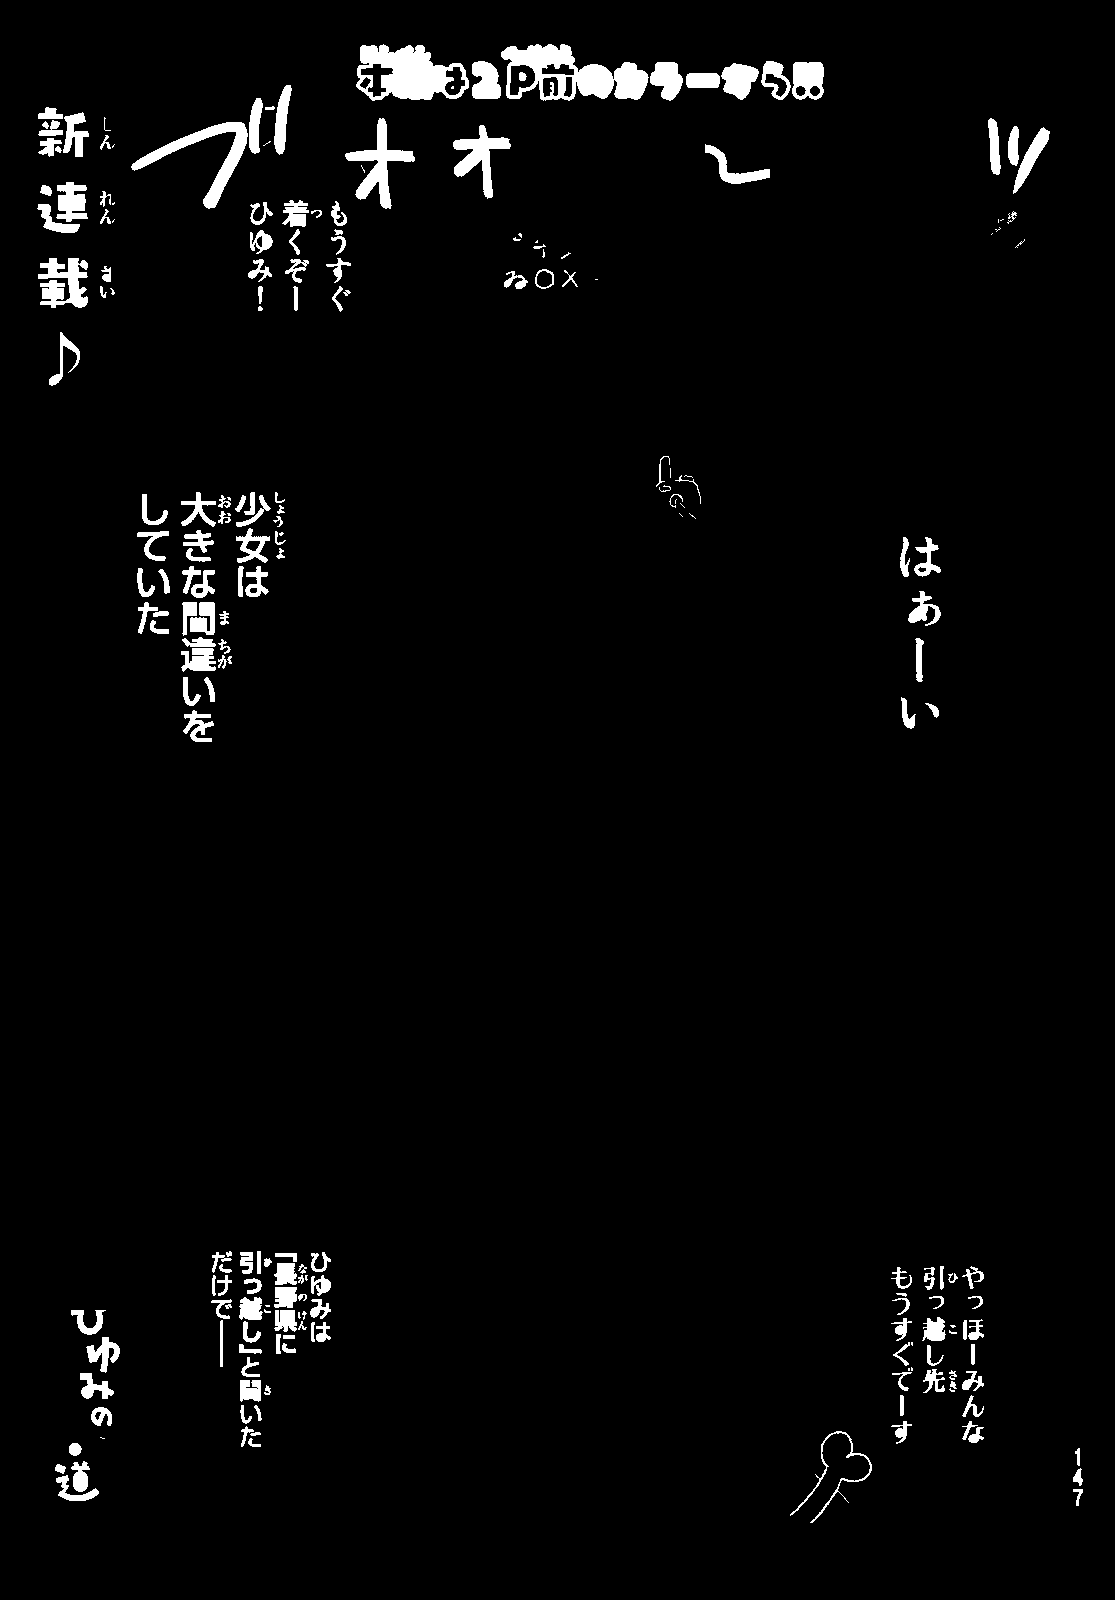

In [246]:
# Baca gambar
image_black = cv2.imread('/content/comic-text-detector/data/examples/annotations/mask-003.png')
cv2_imshow(image_black)

In [247]:
# Baca file teks dengan koordinat
with open('/content/comic-text-detector/data/examples/annotations/003.txt', 'r') as file:
    coordinates = file.read()

-------------------------------

In [248]:
  image_kotakin = cv2.imread(lokasi_image)
  cropped_images = []  # Membuat list untuk menyimpan potongan gambar
  # Loop melalui setiap koordinat bounding box
  for line in coordinates.split('\n'):
      if line.strip():  # Memastikan baris tidak kosong
          _, x, y, width, height = map(float, line.split())
          # Konversi koordinat dan ukuran ke piksel
          width_pixel = int(width * (image_kotakin.shape[1])) +20
          height_pixel = int(height * image_kotakin.shape[0]) +10
          x_pixel = int(x * (image_kotakin.shape[1])) - int((width_pixel-20)/2) -5
          y_pixel = int(y * image_kotakin.shape[0]) - int((height_pixel-10)/2) -10

          # Menggambar kotak pembatas di sekitar objek
          cv2.rectangle(image_kotakin, (x_pixel , y_pixel), (x_pixel + width_pixel, y_pixel + height_pixel), (0, 255, 0), 2)
          # Membuat potongan gambar berdasarkan kotak pembatas
          cropped_image = image_kotakin[y_pixel:y_pixel + height_pixel, x_pixel:x_pixel + width_pixel]
          cropped_images.append(cropped_image)  # Menambahkan potongan gambar ke list


  # Menyimpan gambar dengan kotak pembatas
  # cv2.imwrite('/content/manga-image-translator/result/final_with_bbox.png', image)

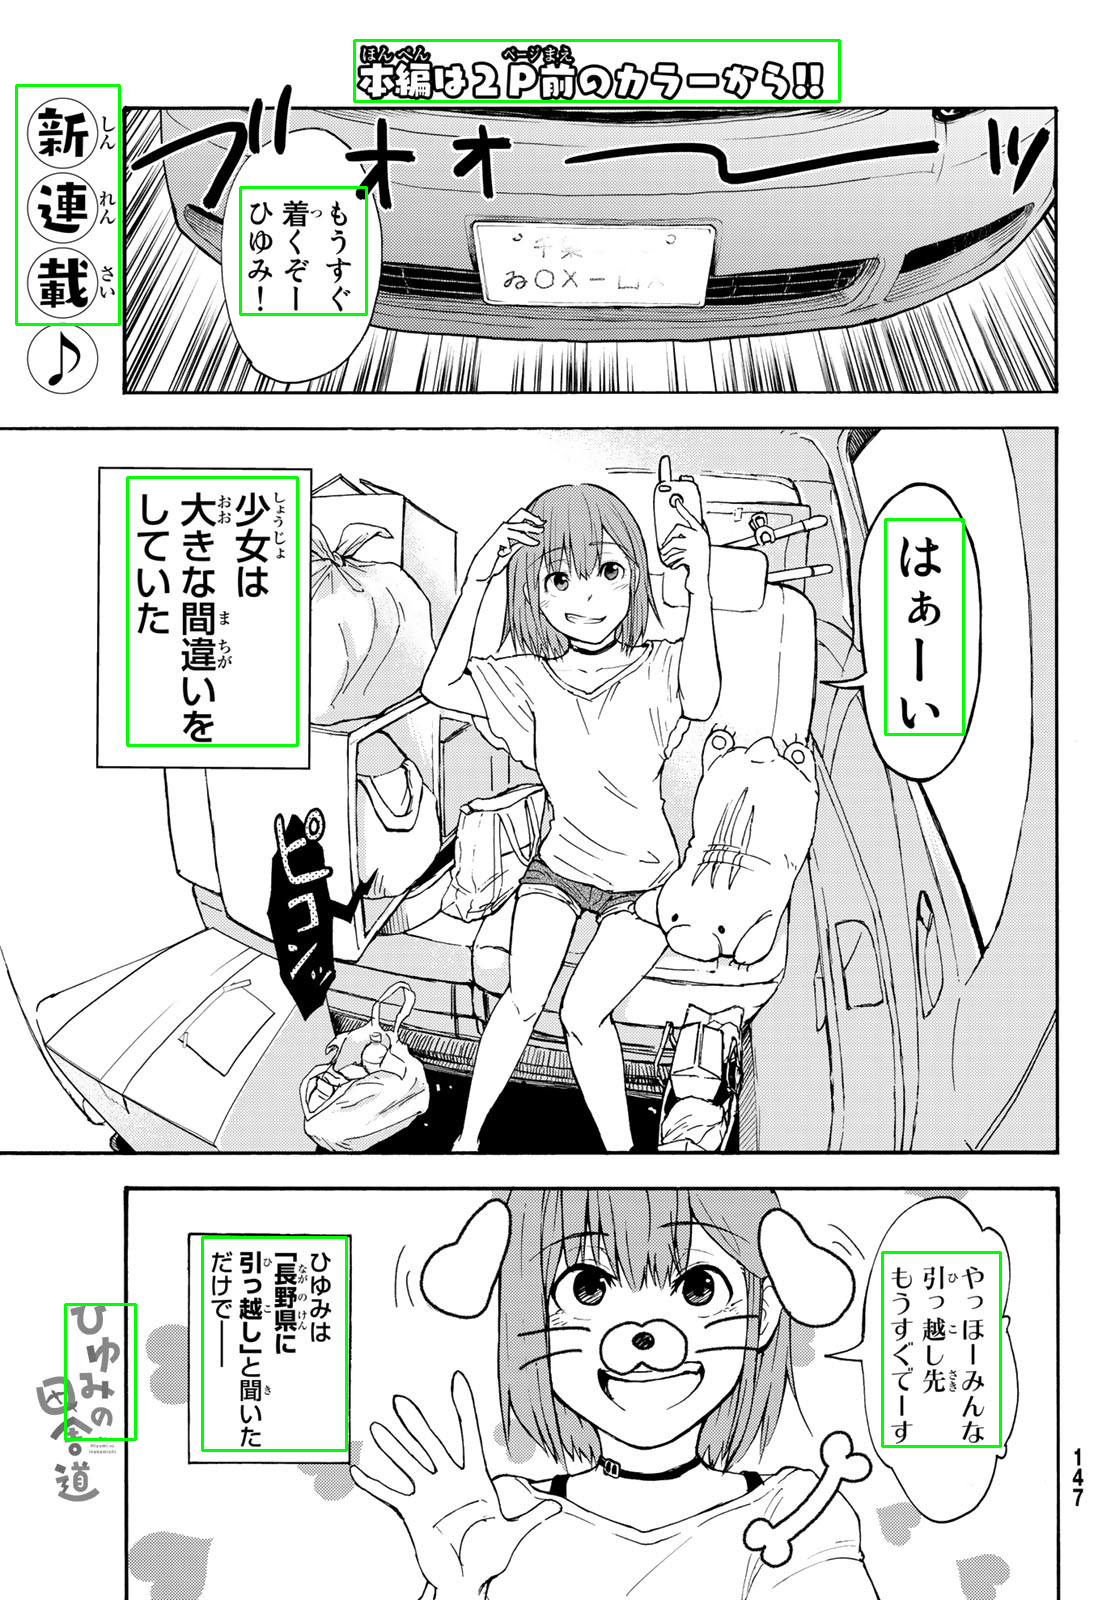

In [249]:
# Tampilkan gambar
cv2_imshow(image_kotakin)

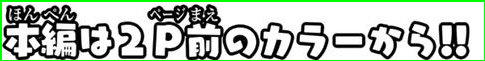

Potongan Gambar ke-1


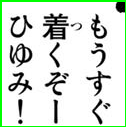

Potongan Gambar ke-2


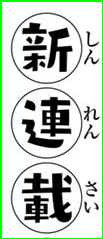

Potongan Gambar ke-3


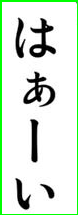

Potongan Gambar ke-4


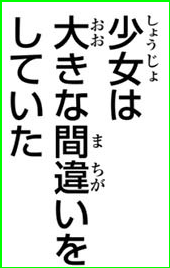

Potongan Gambar ke-5


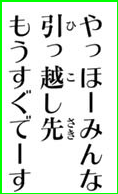

Potongan Gambar ke-6


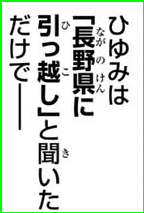

Potongan Gambar ke-7


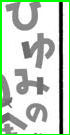

Potongan Gambar ke-8


In [250]:
for i, cropped_image in enumerate(cropped_images):
    cv2_imshow(cropped_image)
    print(f"Potongan Gambar ke-{i+1}")

-------------------------------

In [251]:
image_polos = cv2.imread(lokasi_image)
# Loop melalui setiap koordinat bounding box
for line in coordinates.split('\n'):
    if line.strip():  # Memastikan baris tidak kosong
        _, x, y, width, height = map(float, line.split())
        # Konversi koordinat dan ukuran ke piksel
        width_pixel = int(width * (image_polos.shape[1]))
        height_pixel = int(height * image_polos.shape[0])
        x_pixel = int(x * (image_polos.shape[1])) - int(width_pixel/2)
        y_pixel = int(y * image_polos.shape[0]) - int(height_pixel/2)

        # Menggambar kotak putih di dalam kotak pembatas
        cv2.rectangle(image_polos, (x_pixel , y_pixel), (x_pixel + width_pixel, y_pixel + height_pixel), (255, 255, 255), -1)


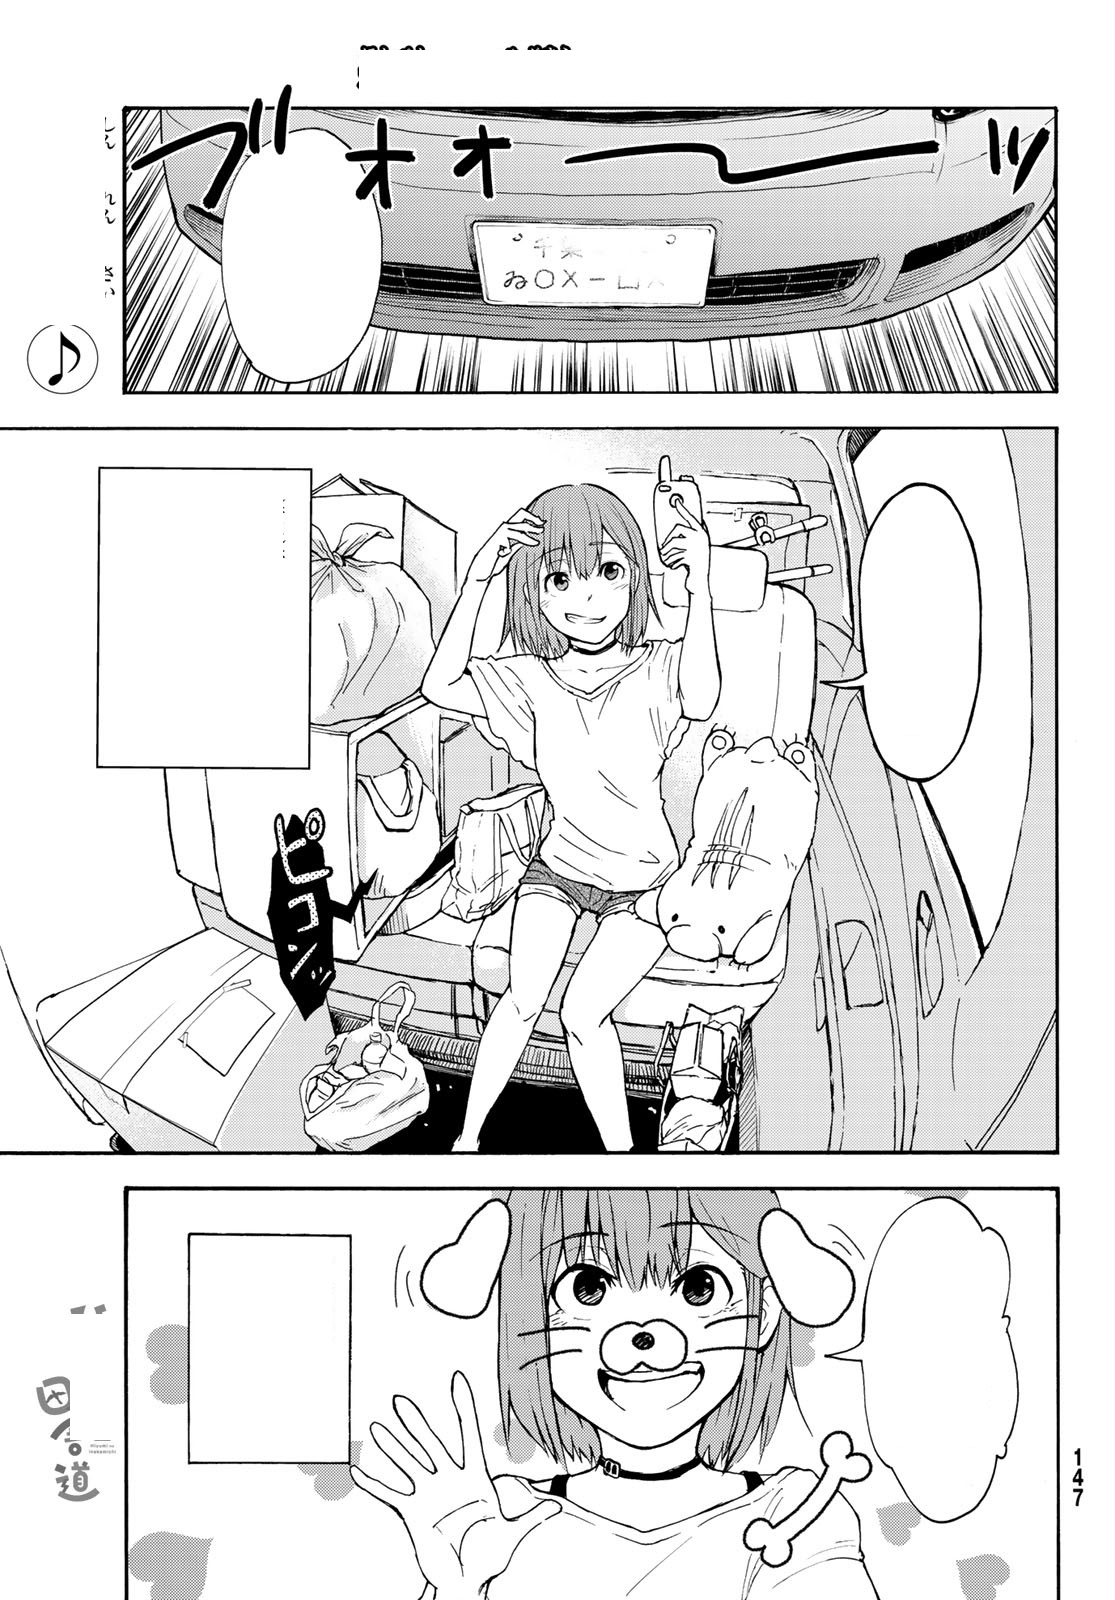

In [252]:
# Tampilkan gambar
cv2_imshow(image_polos)

----------------

In [256]:
image=cv2.imread(lokasi_image)

In [257]:
# Fungsi untuk menambahkan teks dengan memecah baris jika terlalu panjang
def add_text_multiline(image, text, x, y, max_width, max_height):
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 1
    font_color = (0, 0, 0)  # Warna teks (hitam)

     # Fungsi untuk menentukan ukuran font yang sesuai
    def get_font_scale(text, max_width, font=cv2.FONT_HERSHEY_SIMPLEX, font_thickness=1):
        font_scale = 1
        while True:
            (text_w, text_h), _ = cv2.getTextSize(text, font, font_scale, font_thickness)
            if text_w <= max_width:
                break
            font_scale -= 0.1
        return font_scale


    # Membagi teks menjadi baris-baris yang sesuai dengan lebar maksimum
    words = text.split()
    lines = ['']
    current_line = 0
    for word in words:
        test_line = lines[current_line] + ' ' + word if lines[current_line] else word
        (text_w, text_h), _ = cv2.getTextSize(test_line, font, font_scale, font_thickness)
        if text_w <= max_width:
            lines[current_line] = test_line
        else:
            current_line += 1
            lines.append(word)

    # Hitung tinggi total teks
    total_text_height = len(lines) * (text_h + 2)  # Spasi antar baris: 2 piksel

    # Tentukan posisi vertikal tengah
    y_centered = y + int((max_height - total_text_height) / 2)

    # Menambahkan teks ke gambar
    for i, line in enumerate(lines):
        text_size = cv2.getTextSize(line, font, font_scale, font_thickness)[0]
        text_x = int(x + (max_width - text_size[0]) / 2)
        text_y = y_centered + i * (text_h + 2)  # Spasi antar baris: 2 piksel

        cv2.putText(image, line, (text_x, text_y), font, font_scale, font_color, font_thickness, lineType=cv2.LINE_AA)

# ...

# Di dalam loop:
for idx, line in enumerate(coordinates.split('\n')):
    if line.strip():  # Memastikan baris tidak kosong
        _, x, y, width, height = map(float, line.split())
        # Konversi koordinat dan ukuran ke piksel
        width_pixel = int(width * (image2.shape[1]))
        height_pixel = int(height * image2.shape[0]) + 10
        x_pixel = int(x * (image2.shape[1])) - int(width_pixel/2)
        y_pixel = int(y * image2.shape[0]) - int(height_pixel/2)

        # Menggambar kotak putih di dalam kotak pembatas
        cv2.rectangle(image, (x_pixel , y_pixel), (x_pixel + width_pixel, y_pixel + height_pixel), (255, 255, 255), -1)

        # Menambahkan teks ke dalam kotak putih
        text = f"Ini box {idx + 1}"
        add_text_multiline(image, text, x_pixel, y_pixel, width_pixel, height_pixel)


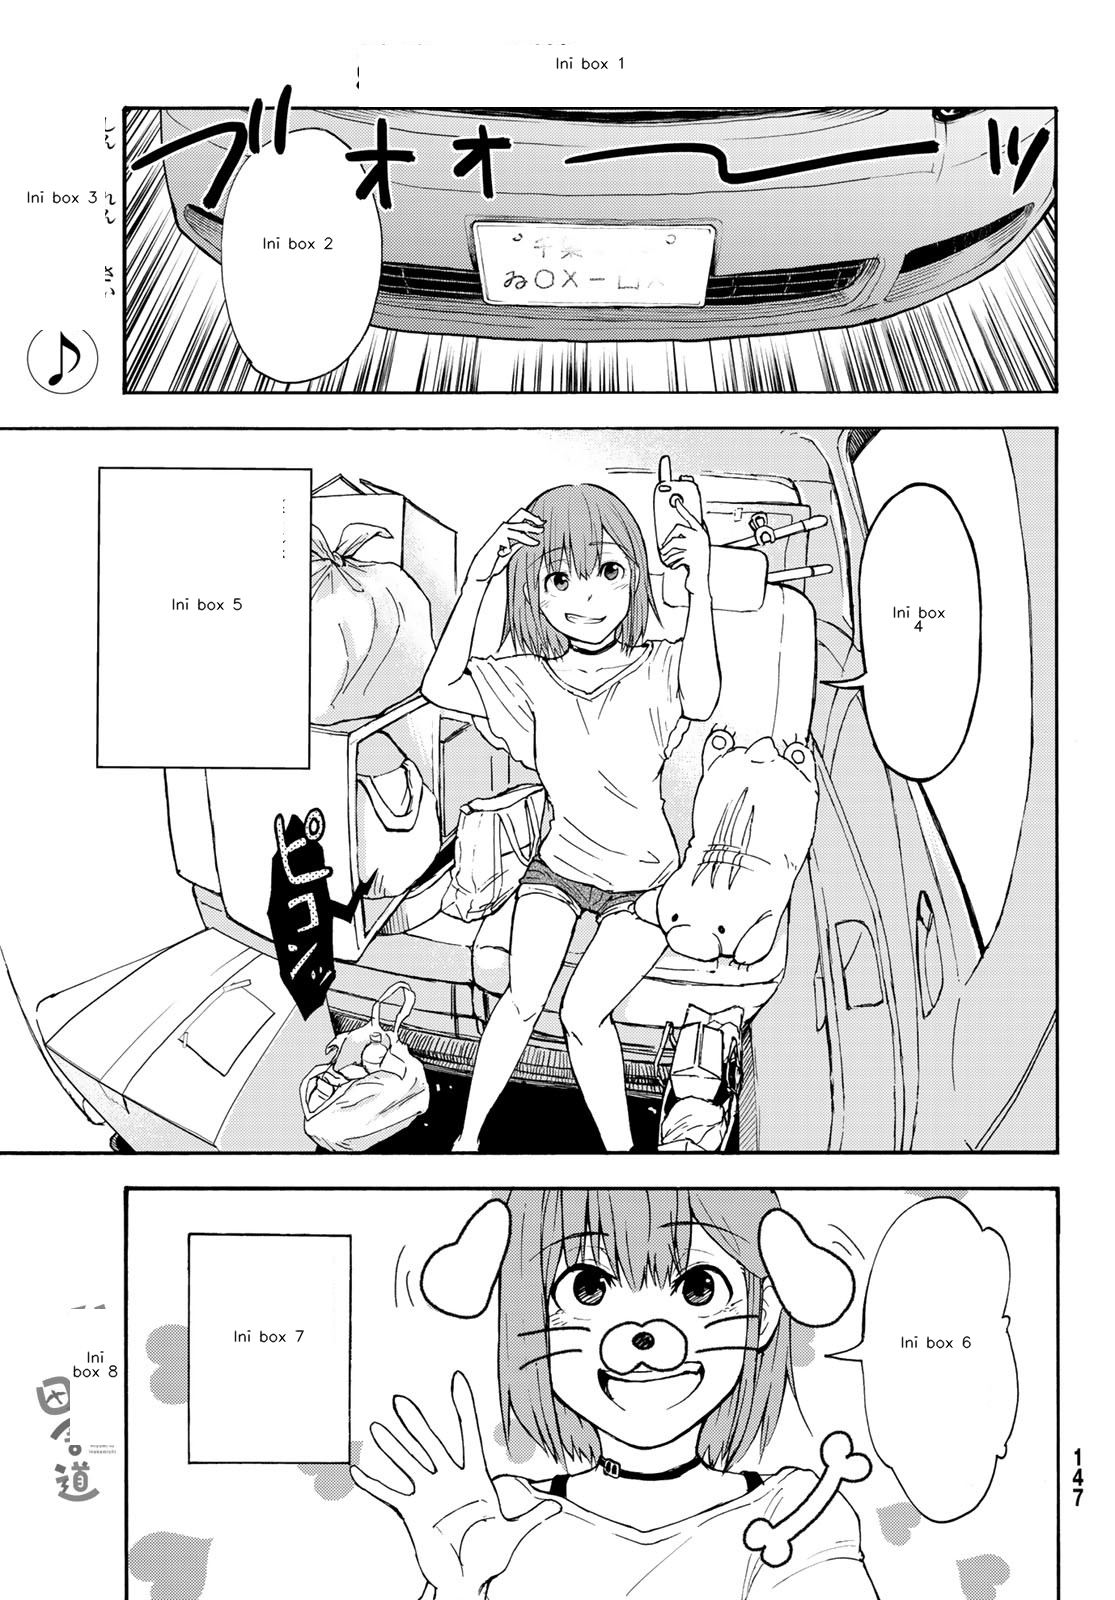

In [258]:
# Tampilkan gambar
cv2_imshow(image)